In [375]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 0. 运动员表
## 0.1 去除奖项

In [376]:
# 读取数据
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# 删除重复的行
athletes = athletes.drop_duplicates()

# 处理缺失值
athletes = athletes.dropna()

# 转换数据类型
athletes['Year'] = athletes['Year'].astype(int)
athletes['Medal'] = athletes['Medal'].astype(str)

# 删除文字中的空格
# 去除列中所有字符串数据前后的空格
athletes['NOC'] = athletes['NOC'].str.strip()  # 去除前后的空格
athletes['Sport'] = athletes['Sport'].str.strip()
athletes['Name'] = athletes['Name'].str.strip()

# 删除列中所有字符串数据中的空格（包括内部的空格）
athletes['NOC'] = athletes['NOC'].str.replace(' ', '', regex=False)
athletes['Sport'] = athletes['Sport'].str.replace(' ', '', regex=False)
athletes['Name'] = athletes['Name'].str.replace(' ', '', regex=False)

# 打印清洗后的数据
athletes


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,ADijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,ALamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,GunnarAaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia(-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,SeforaAda,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,EmanuelaLiuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [377]:
athletes_with_medal = athletes[athletes['Medal'] != 'No medal']
athletes_with_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...
252551,QuincyWilson,M,United States,USA,2024,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,vanAnne,F,Netherlands,NED,2024,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [378]:
athletes_with_gold_medal = athletes[athletes['Medal'] == 'Gold']
athletes_with_gold_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
18,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
22,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
33,RagnhildAamodt,F,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
...,...,...,...,...,...,...,...,...,...
252244,JanjaGarnbret,F,Slovenia,SLO,2024,Paris,SportClimbing,Women's Boulder & Lead,Gold
252475,CroixBethune,F,United States,USA,2024,Paris,Football,Women,Gold
252544,AaliyahButler,F,United States,USA,2024,Paris,Athletics,Women's 4 x 400m Relay,Gold
252550,QuincyWilson,M,United States,USA,2024,Paris,Athletics,Men's 4 x 400m Relay,Gold


## 0.2 离散点

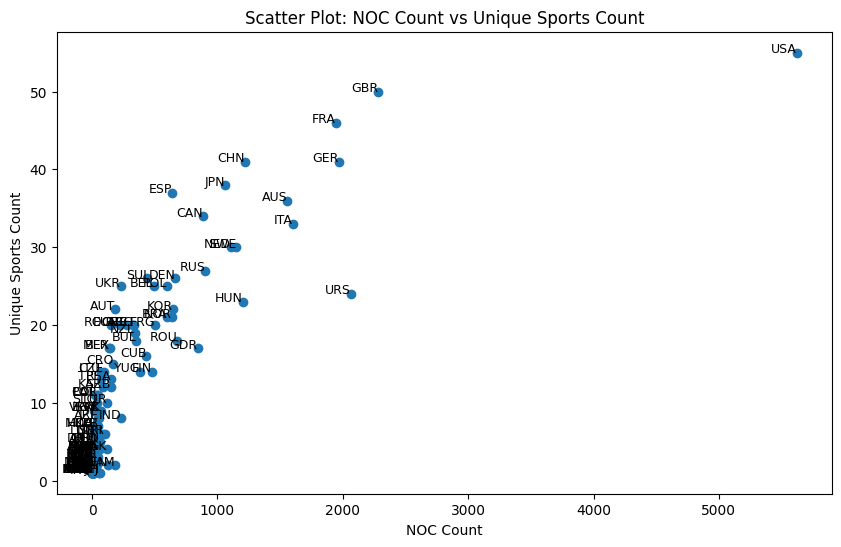

In [379]:
# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_point = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_point.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_medal, sport_counts_medal_point)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts_medal_point.index, noc_sport_counts_medal, sport_counts_medal_point):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


# 0.3 归一化排名和k-means

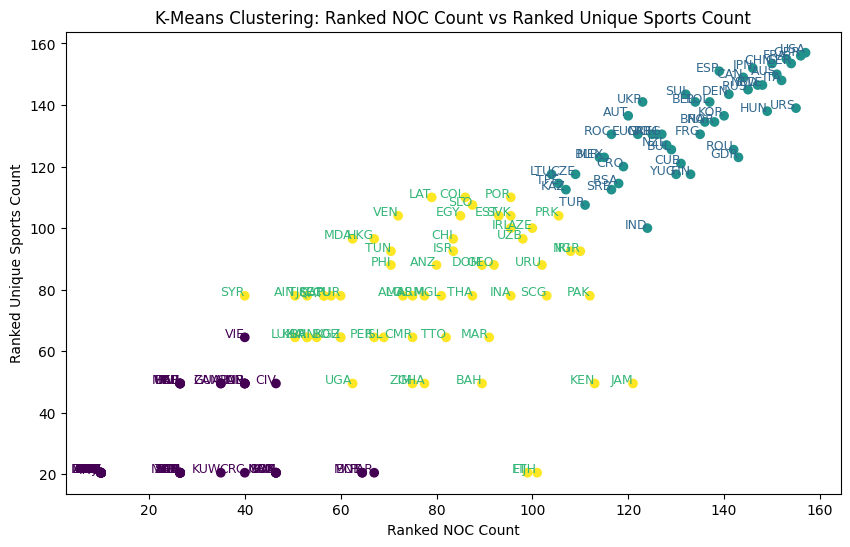

In [393]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_kmeans = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_kmeans.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts_medal.rank()
sport_counts_rank = sport_counts_medal_kmeans.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_point.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


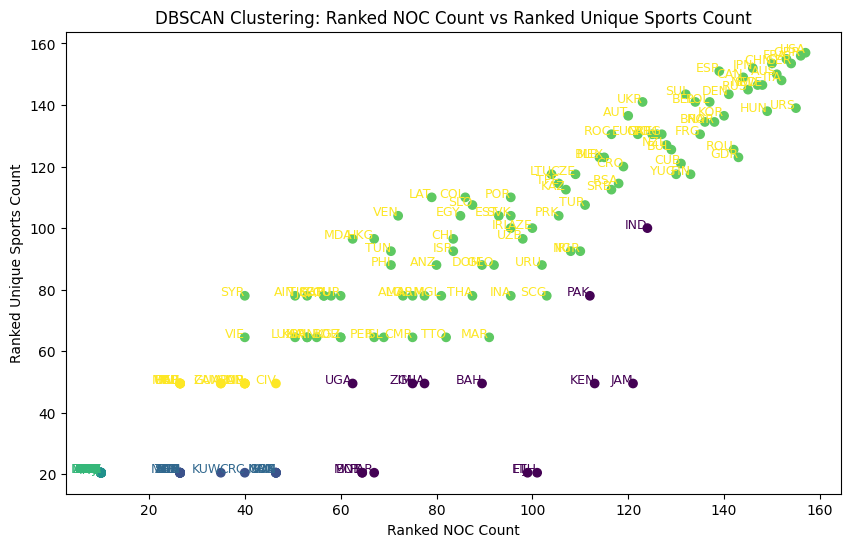

In [381]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_dbscan = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts_medal.loc[sport_counts_medal_dbscan.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts_medal_dbscan.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_dbscan.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


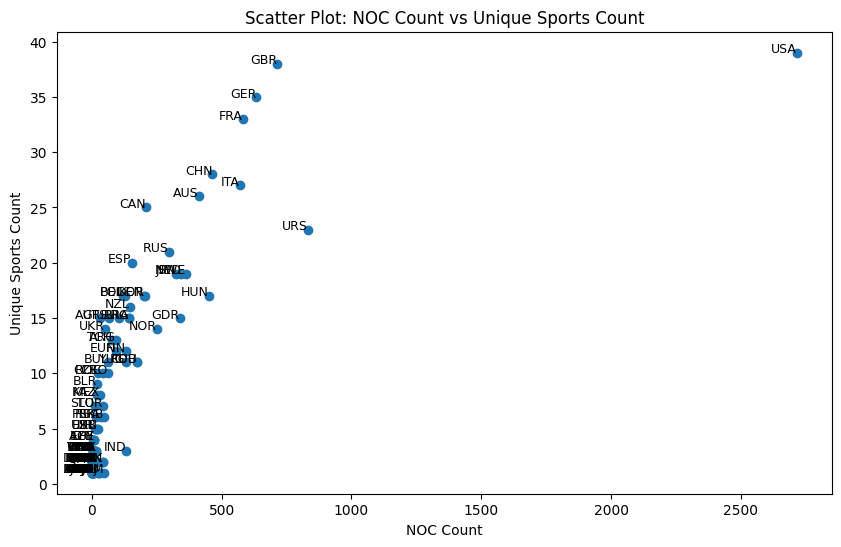

In [382]:
# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts, sport_counts)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts.index, noc_sport_counts, sport_counts):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


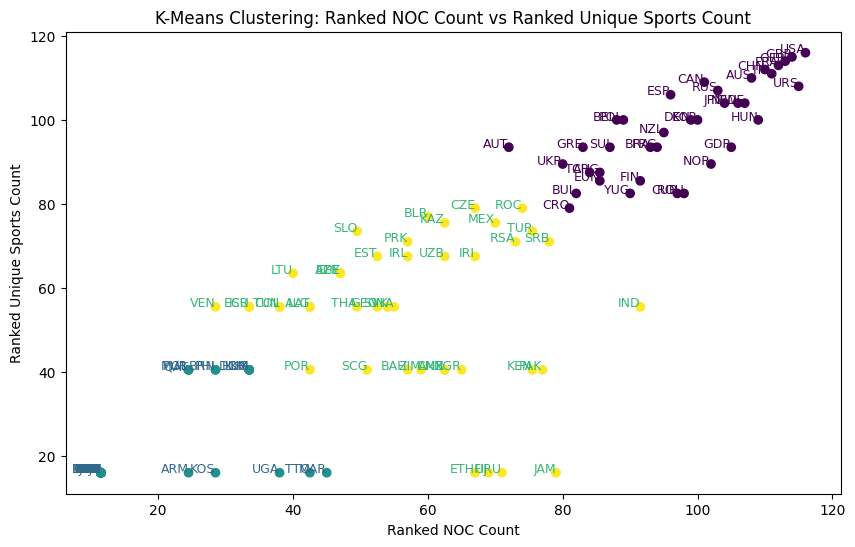

In [394]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


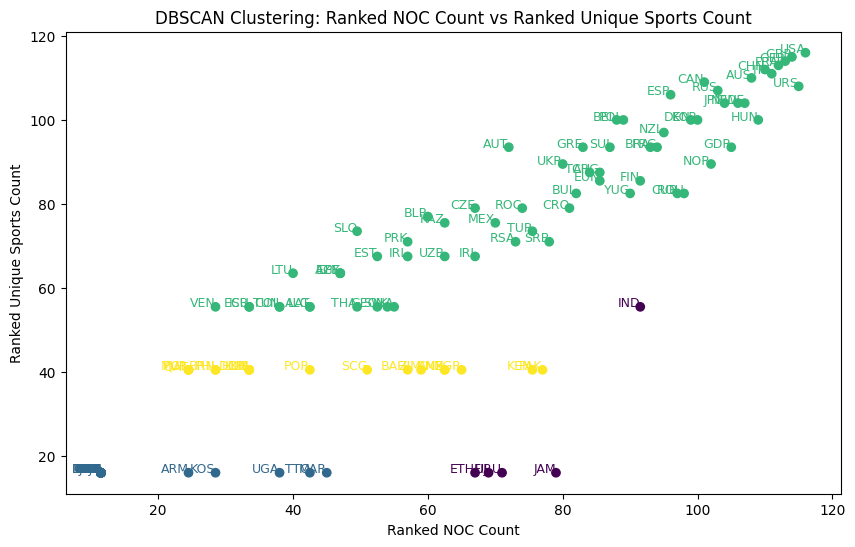

In [348]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


# 1.数据预处理分析
# 1.1 东道主分析

In [349]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
hosts

,Year,Host,NOC
0,1896,"Athens, Greece",GRE
1,1900,"Paris, France",FRA
2,1904,"St. Louis, United States",USA
3,1908,"London, United Kingdom",GRB
4,1912,"Stockholm, Sweden",SWE
5,1916,Cancelled (WWI – Berlin had been awarded),NaN
6,1920,"Antwerp, Belgium",BEL
7,1924,"Paris, France",FRA
8,1928,"Amsterdam, Netherlands",NED
9,1932,"Los Angeles, United States",USA


    Year                                         Host  NOC
5   1916    Cancelled (WWI – Berlin had been awarded)  NaN
10  1936                              Berlin, Germany  NaN
11  1940    Cancelled (WWII – Tokyo had been awarded)  NaN
12  1944   Cancelled (WWII – London had been awarded)  NaN
33  2028                   Los Angeles, United States  NaN
34  2032                          Brisbane, Australia  NaN


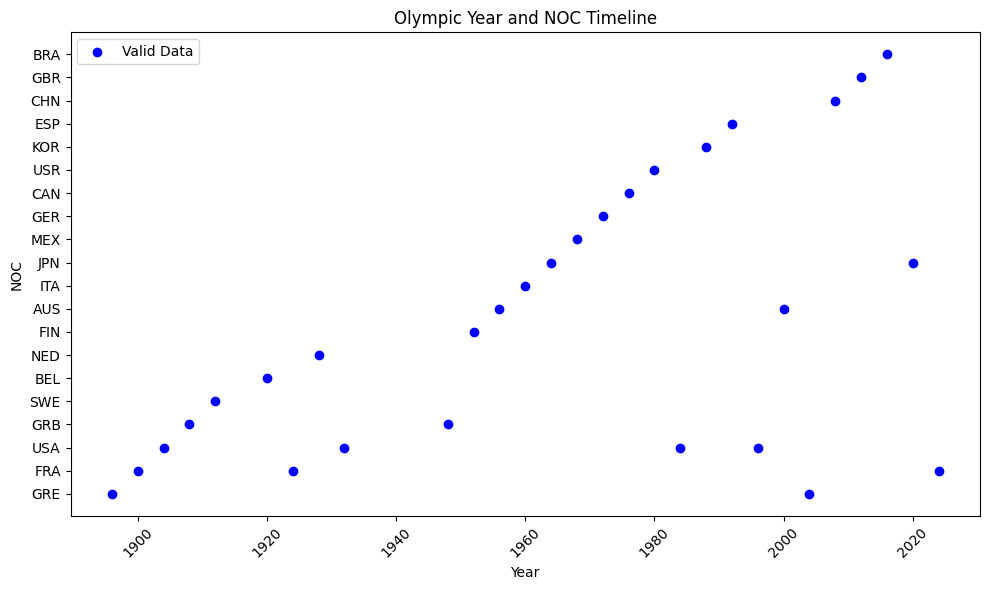

In [350]:
# 创建一个图形
plt.figure(figsize=(10, 6))

# 绘制正常的数据点
valid_data = hosts.dropna()  # 去掉NaN值的数据
plt.scatter(valid_data['Year'], valid_data['NOC'], color='b', marker='o', label='Valid Data')

# 找到 'Year' 或 'NOC' 列有NaN的行
invalid_data = hosts[hosts['Year'].isna() | hosts['NOC'].isna()]  # 确保检查 'Year' 或 'NOC' 中的NaN

# 输出NaN数据
print(invalid_data)

# 设置图标题和标签
plt.title('Olympic Year and NOC Timeline')
plt.xlabel('Year')
plt.ylabel('NOC')
plt.xticks(rotation=45)
plt.tight_layout()

# 添加图例
plt.legend()

# 显示图形
plt.show()

# 1.2 奖牌映射

In [351]:
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,NaN,11,7,2,20,1896
1,2,Greece,NaN,10,18,19,47,1896
2,3,Germany,NaN,6,5,2,13,1896
3,4,France,NaN,5,4,2,11,1896
4,5,Great Britain,NaN,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,NaN,0,0,1,1,2024
1431,84,Refugee Olympic Team,NaN,0,0,1,1,2024
1432,84,Singapore,NaN,0,0,1,1,2024
1433,84,Slovakia,NaN,0,0,1,1,2024


In [352]:
# 统计每个国家的出现次数
country_counts = medal_counts['Country'].value_counts()
country_counts

Country
Great Britain           30
France                  30
Denmark                 29
United States           29
Canada                  28
                        ..
Saint Lucia              1
Dominica                 1
Albania                  1
Cabo Verde               1
Refugee Olympic Team     1
Name: count, Length: 162, dtype: int64

## NOC 键值对和输出的csv

In [353]:
country_to_noc_df = pd.read_csv('2025_Problem_C_Data/NOC_dict_alter.csv')
country_to_noc = dict(zip(country_to_noc_df['Country'], country_to_noc_df['NOC']))
country_to_noc_df

,Country,Unnamed: 1,Unnamed: 2,NOC
0,Afghanistan,AFG,NaN,AFG
1,Albania,ALB,NaN,ALB
2,Algeria,ALG,NaN,ALG
3,Netherlands Antilles,ANT,AHO,AHO
4,United Arab Emirates,ARE,UAE,UAE
...,...,...,...,...
157,Vietnam,VNM,VIE,VIE
158,FR Yugoslavia,YUG,NaN,YUG
159,Yugoslavia,YUG,NaN,YUG
160,Zambia,ZAM,NaN,ZAM


In [354]:
# 使用 .map() 方法将 'Country' 列的值转换为 'NOC'
medal_counts['NOC'] = medal_counts['Country'].map(country_to_noc)
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,USA,11,7,2,20,1896
1,2,Greece,GRE,10,18,19,47,1896
2,3,Germany,GER,6,5,2,13,1896
3,4,France,FRA,5,4,2,11,1896
4,5,Great Britain,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,QAT,0,0,1,1,2024
1431,84,Refugee Olympic Team,ROT,0,0,1,1,2024
1432,84,Singapore,SGP,0,0,1,1,2024
1433,84,Slovakia,SVK,0,0,1,1,2024


# 1.3 项目表

In [355]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31.0,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257.0,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34.0,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## 1.4 统计奖牌数

<Figure size 1000x600 with 0 Axes>

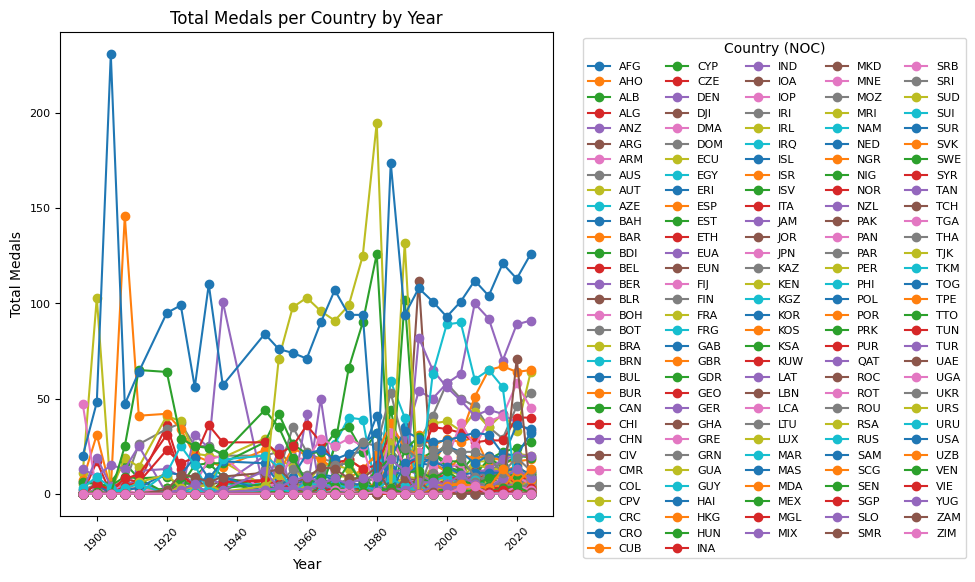

In [356]:
# Group by Year and Country, summing total medals
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


- 参赛人数统计

<Figure size 1000x600 with 0 Axes>

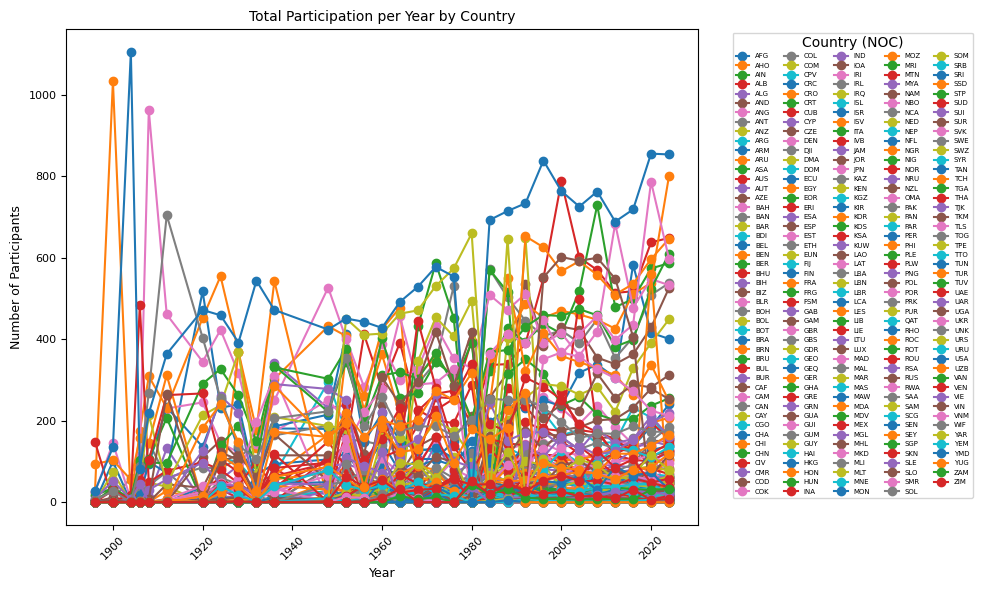

In [357]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


# 1.5 数据清洗
- 去除参赛人数Year中后三项全为0的列
- 删除东道主点
- 删除离群点，阈值为20
- 线性插值填充NAN

In [358]:
# 按年份和国家（NOC）统计参赛人数
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)

# 删除 `participation_by_year_country` 表中最后三行全为0的列
# 假设 `participation_by_year_country` 是已经存在的 DataFrame
bad_columns = participation_by_year_country.iloc[-3:].sum(axis=0) == 0  # 找到最后三行全为0的列
columns_to_delete = bad_columns[bad_columns].index  # 获取这些列的列名

# 从 `medals_by_year_clean` 表中删除这些列
medals_by_year_clean = medals_by_year.loc[:, ~medals_by_year.columns.isin(columns_to_delete)]

# 遍历 hosts 表的每一行，获取 Year 和 NOC
for _, row in hosts.iterrows():
    year = row['Year']
    noc = row['NOC']
    
    # 如果该 Year 和 NOC 在 participation_by_year_country_q1_clean 中，设置为 NaN
    if year in medals_by_year_clean.index and noc in medals_by_year_clean.columns:
        medals_by_year_clean.at[year, noc] = None  # 设置为 NaN

# 设置一个阈值，假设阈值为某个差异的倍数，可以根据数据调整
threshold = 50

# 对每个国家的参赛人数进行遍历，计算相邻年份之间的差异
for country in medals_by_year_clean.columns:
    for year in range(1, len(medals_by_year_clean)):
        # 计算当前年份和上一年份之间的差异
        previous_value = medals_by_year_clean.loc[medals_by_year_clean.index[year - 1], country]
        current_value = medals_by_year_clean.loc[medals_by_year_clean.index[year], country]
        
        difference = abs(current_value - previous_value)
        
        # 如果差异大于阈值，认为是坏点
        if difference > threshold:
            medals_by_year_clean.loc[medals_by_year_clean.index[year], country] = None  # 设置为 NaN

# 对坏点（NaN）进行线性插值填充
medals_by_year_clean = medals_by_year_clean.interpolate(method='linear', axis=0)



<Figure size 1000x600 with 0 Axes>

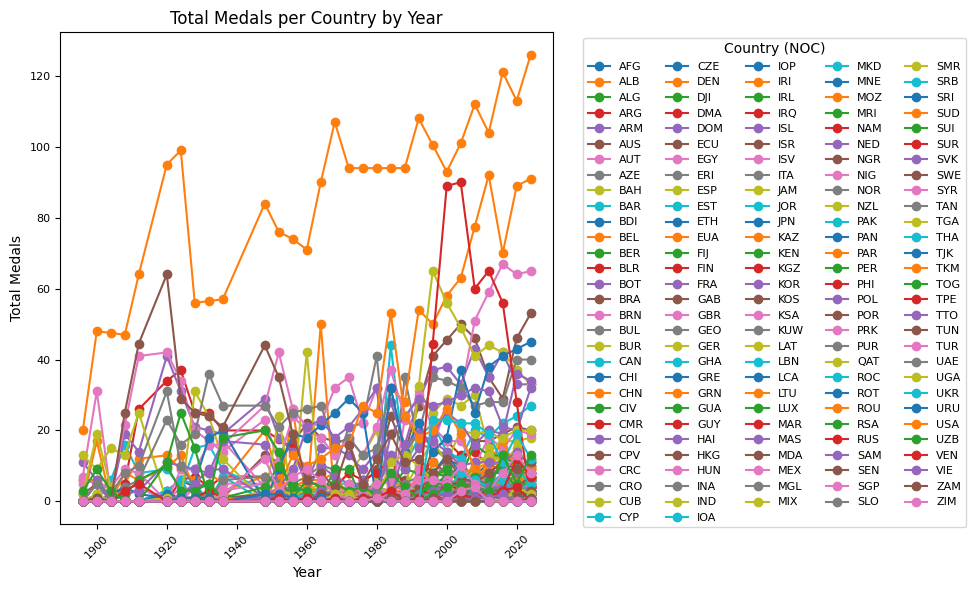

In [359]:
# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year_clean.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()
    

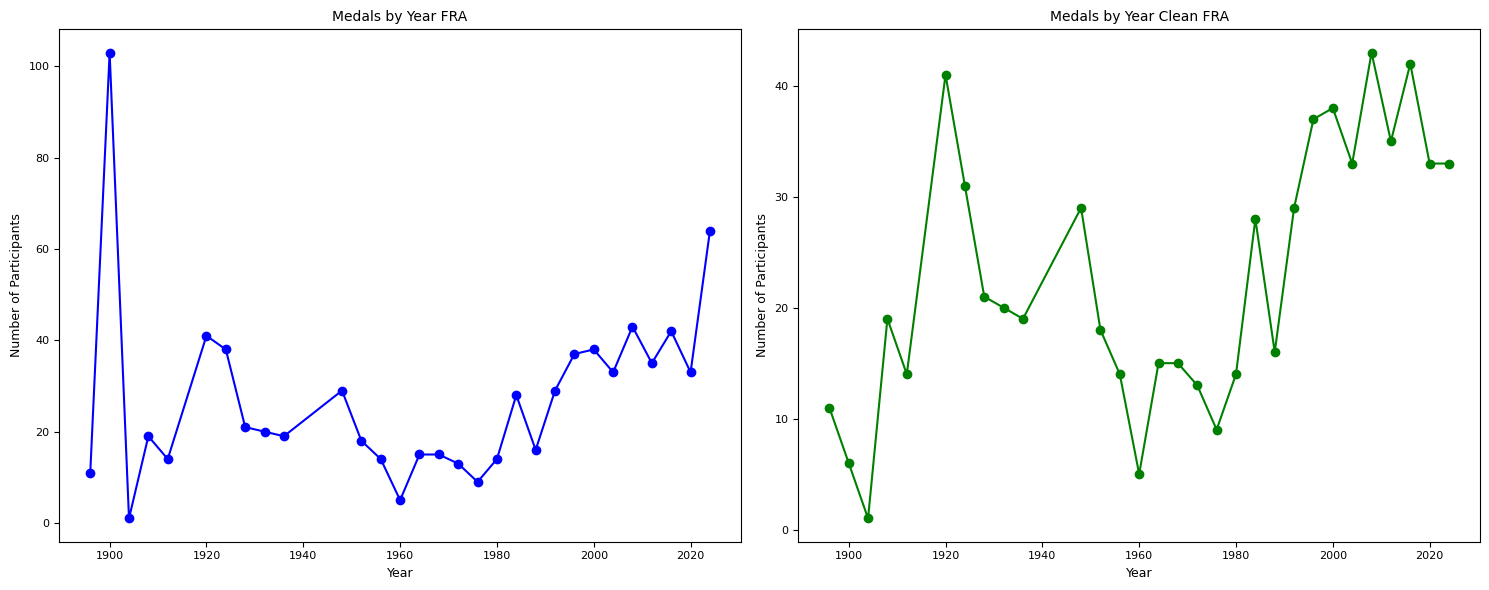

In [360]:
# 创建一个 1 行 2 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

NOC = 'FRA'

# 绘制第一个子图: medals_by_year_clean
axes[0].plot(medals_by_year[NOC], marker='o', color='b')
axes[0].set_title(f'Medals by Year {NOC}', fontsize=10)
axes[0].set_xlabel('Year', fontsize=9)
axes[0].set_ylabel('Number of Participants', fontsize=9)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# 绘制第二个子图: medals_by_year
axes[1].plot(medals_by_year_clean[NOC], marker='o', color='g')
axes[1].set_title(f'Medals by Year Clean {NOC}', fontsize=10)
axes[1].set_xlabel('Year', fontsize=9)
axes[1].set_ylabel('Number of Participants', fontsize=9)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# 设置整体布局
plt.tight_layout()

# 显示图表
plt.show()


## 1.6 获得刚才聚类中能做时间序列部分，并过滤

In [396]:
# 获取每个聚类中 NOC 的索引
clustered_nocs = {}
for label in np.unique(labels):
    clustered_nocs[label] = sport_counts.index[labels == label].tolist()

# 输出每个类的 NOC
for cluster, nocs in clustered_nocs.items():
    print(f"Cluster {cluster}: {nocs}")


Cluster 0: ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BUL', 'CAN', 'CHN', 'CRO', 'CUB', 'DEN', 'ESP', 'EUN', 'FIN', 'FRA', 'FRG', 'GBR', 'GDR', 'GER', 'GRE', 'HUN', 'ITA', 'JPN', 'KOR', 'NED', 'NOR', 'NZL', 'POL', 'ROU', 'RUS', 'SUI', 'SWE', 'TCH', 'UKR', 'URS', 'USA', 'YUG']
Cluster 1: ['AIN', 'ARM', 'BDI', 'BER', 'BOT', 'BRN', 'CHI', 'CIV', 'CRC', 'DMA', 'DOM', 'GRN', 'GUA', 'HAI', 'HKG', 'IOA', 'JOR', 'KOS', 'LCA', 'LUX', 'MAR', 'MGL', 'MOZ', 'PAN', 'PER', 'PHI', 'PUR', 'QAT', 'SGP', 'SUR', 'SYR', 'TJK', 'TTO', 'UAE', 'UGA', 'VIE']
Cluster 2: ['ALG', 'ANZ', 'AZE', 'BAH', 'BLR', 'CMR', 'COL', 'CZE', 'ECU', 'EGY', 'EST', 'ETH', 'FIJ', 'GEO', 'INA', 'IND', 'IRI', 'IRL', 'ISR', 'JAM', 'KAZ', 'KEN', 'LAT', 'LTU', 'MEX', 'NGR', 'PAK', 'POR', 'PRK', 'ROC', 'RSA', 'SCG', 'SLO', 'SRB', 'SVK', 'THA', 'TPE', 'TUN', 'TUR', 'URU', 'UZB', 'VEN', 'ZIM']


- Cluster 0 : 可以时间序列的类
- Cluster 1 : 较没参考意义的数据，直接均值预测
- Cluster 2 : 需要重写建模的类

In [397]:
# 获取 Cluster 0 中的 NOC 列
cluster_0_nocs = clustered_nocs[0]

# 只保留 Cluster 0 中的 NOC 列
medals_by_year_clean_cluster_0_columns = medals_by_year_clean.loc[:, medals_by_year_clean.columns.isin(cluster_0_nocs)]

# 显示结果
medals_by_year_clean_cluster_0_columns


NOC,ARG,AUS,AUT,BEL,BRA,BUL,CAN,CHN,CRO,CUB,...,NED,NOR,NZL,POL,ROU,RUS,SUI,SWE,UKR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,2.0,5,0.0,0.0,0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,3,0.0,0,20.0
1900,0,5.0,6,17.0,0.0,0,2.0,0.0,0,2,...,5.0,5,0,0,0,0.0,9,1.0,0,48.0
1904,0,4.0,3,0.0,0.0,0,6.0,0.0,0,3,...,0.0,2,0,0,0,0.0,3,0.0,0,47.5
1908,0,0.0,1,8.0,0.0,0,16.0,0.0,0,0,...,2.0,8,0,0,0,3.0,0,25.0,0,47.0
1912,0,0.0,4,6.0,0.0,0,8.0,0.0,0,0,...,3.0,10,0,0,0,5.0,0,44.5,0,64.0
1920,0,3.0,0,9.5,3.0,0,9.0,0.0,0,0,...,11.0,31,1,0,0,0.0,11,64.0,0,95.0
1924,6,6.0,4,13.0,0.0,0,4.0,0.0,0,0,...,10.0,10,1,2,1,0.0,25,29.0,0,99.0
1928,7,4.0,3,3.0,0.0,0,15.0,0.0,0,0,...,9.0,4,1,5,0,0.0,15,25.0,0,56.0
1932,4,5.0,5,1.0,0.0,0,16.0,0.0,0,0,...,8.0,0,1,9,0,0.0,1,24.0,0,56.5


## 1.7 隐马尔可夫模型
- 引入时间加权，给较近年份更高权重
- 作为对比参照模型

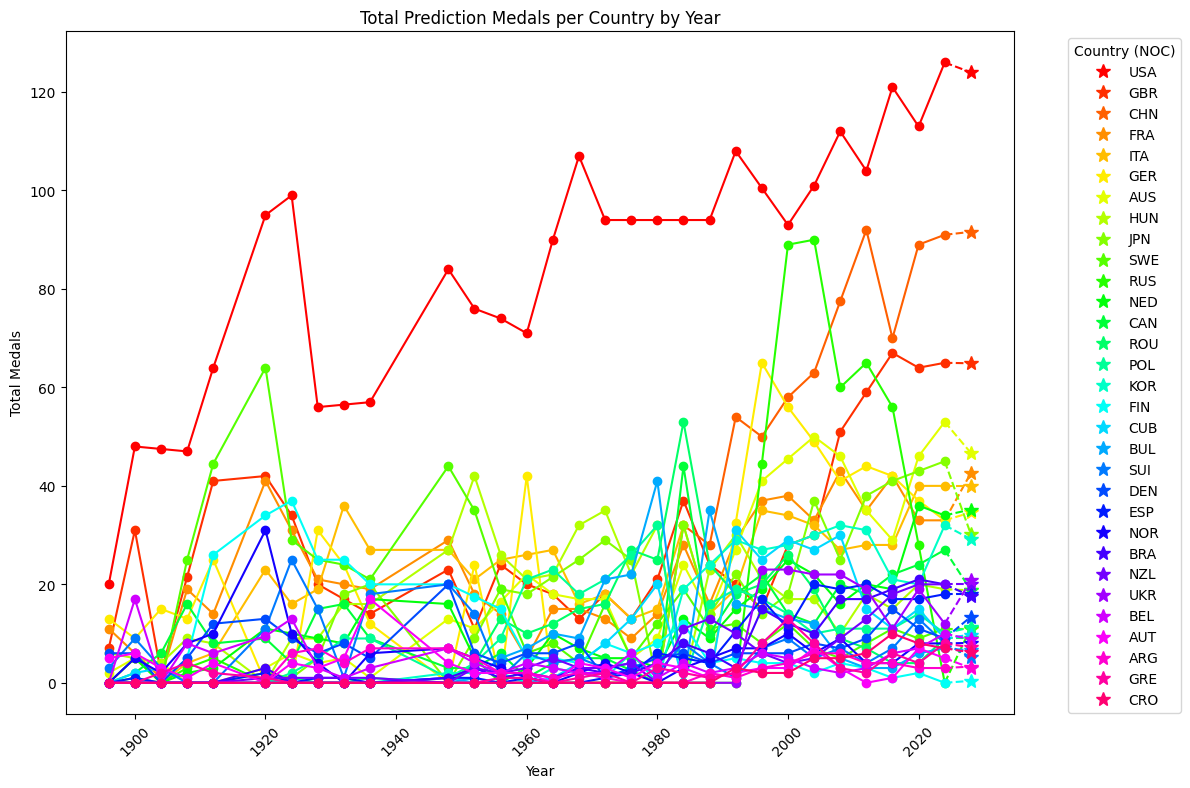

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 步骤一：定义状态空间，使用最近数据进行状态划分
num_states = 5  # 将参与人数划分为5个状态
decay_factor = 0.9  # 时间加权因子
smooth_constant = 1e-4  # 平滑常数

# 选择前10个国家，可以根据某种标准排序
top_countries = medals_by_year_clean_cluster_0_columns.sum().sort_values(ascending=False).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 创建一个空的数据框来存储损失
loss_data = []

# 遍历前10个国家，进行预测
for index, country in enumerate(top_countries):
    country_table = medals_by_year_clean_cluster_0_columns[country]

    # 获取每个国家的年份和参与人数
    years = medals_by_year_clean_cluster_0_columns.index.values
    participants = country_table.values

    # 使用最近的数据来计算状态划分
    recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
    state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
    states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引

    # 修正：确保状态值在0到num_states-1之间
    states = np.clip(states, 0, num_states - 1)

    # 引入时间加权，给较近年份更高权重
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 计算加权状态转移矩阵
    transition_matrix = np.zeros((num_states, num_states))

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        
        # 加权转移次数
        weight = weights[i]
        transition_matrix[current_state, next_state] += weight

    # 将转移次数转化为概率
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误

    # 对转移矩阵进行平滑处理，防止出现零概率
    transition_matrix += smooth_constant
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化

    # 步骤三：预测未来状态
    current_state = states[-1]  # 假设当前状态是最后一年的状态

    # 预测下一个状态
    future_state_probs = transition_matrix[current_state]

    # 如果概率包含 NaN 或零概率，进行处理
    future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效

    # 确保概率和为1
    future_state_probs /= np.sum(future_state_probs)

    # 使用概率选择下一个状态
    predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)

    # 将预测的状态映射回参与人数区间
    predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2

    # 计算损失：预测的参与人数与实际参与人数之间的差异
    loss = np.abs(predicted_participation - participants[-1])

    # 将损失存储在数据框中
    loss_data.append({
        'Country': country,
        'Actual Participation': participants[-1],
        'Predicted Participation': predicted_participation,
        'Loss': loss
    })

    # 绘制原始数据
    line_color = plt.cm.hsv(index * 8)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 预测的参与人数和实际数据的连接（虚线）
    plt.plot([years[-1], years[-1] + 4], [participants[-1], predicted_participation], linestyle='--', color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation, '*', label=f'{country}', markersize=10, color=line_color)

# 将损失数据转化为DataFrame
hmm_loss_df = pd.DataFrame(loss_data)

# 添加标题和标签
plt.title('Total Prediction Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 隐马尔科夫损失（绝对误差）

In [399]:
# 计算Loss列的平均值
hmm_average_loss = hmm_loss_df['Loss'].mean()
# 输出平均值
print(f'Average Loss: {hmm_average_loss}')
hmm_loss_df

Average Loss: 2.74516129032258


,Country,Actual Participation,Predicted Participation,Loss
0,USA,126.0,124.0,2.0
1,GBR,65.0,64.9,0.1
2,CHN,91.0,91.6,0.6
3,FRA,33.0,42.6,9.6
4,ITA,40.0,40.0,0.0
5,GER,33.0,34.6,1.6
6,AUS,53.0,46.7,6.3
7,HUN,19.0,18.8,0.2
8,JPN,45.0,30.2,14.8
9,SWE,11.0,11.0,0.0


## 1.8 时间序列
- tensorflow框架
- lstm模型
- 关注过去10次奥运
- 设置时间权重，越近的年份关注的权重越大

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

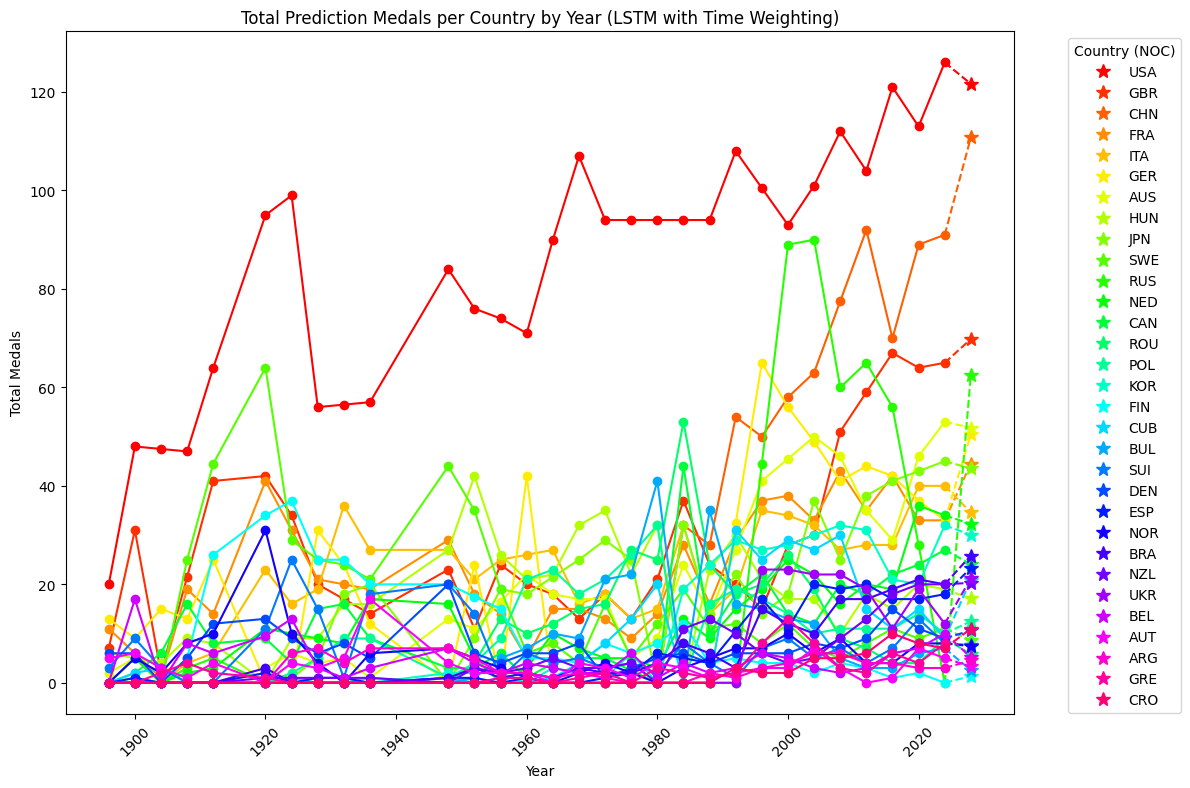

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import Callback

# 选择前10个国家
top_countries = medals_by_year_clean_cluster_0_columns.sum().sort_values(ascending=False).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 创建一个字典来存储每个国家的损失值
losses = {country: [] for country in top_countries}

# 自定义回调函数来记录每个epoch的损失值
class LossHistory(Callback):
    def __init__(self, country):
        # 在回调中存储国家名
        self.country = country
        super().__init__()

    def on_epoch_end(self, epoch, logs=None):
        # 将每个epoch的损失值记录到对应国家的列表中
        losses[self.country].append(logs['loss'])

# 处理每个国家
for index, country in enumerate(top_countries):
    country_table = medals_by_year_clean[country]

    # 获取每个国家的年份和参与人数
    years = medals_by_year_clean.index.values
    participants = country_table.values

    # 数据预处理：标准化
    scaler = MinMaxScaler(feature_range=(0, 1))
    participants_scaled = scaler.fit_transform(participants.reshape(-1, 1))

    # 创建时间步数据（滑动窗口）
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 20  # 使用过去20次的数据来预测
    X, y = create_dataset(participants_scaled, time_step)

    # 重塑输入数据形状为 [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # 引入时间加权，给较近的时间点权重越大
    decay_factor = 0.9  # 越近的时间点权重越大
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 3. LSTM 模型构建
    model = Sequential()
    model.add(Input(shape=(X.shape[1], 1)))  # 第一层 Input
    model.add(LSTM(units=50, return_sequences=False))  # LSTM 层
    model.add(Dense(units=1))  # 输出一个预测值
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 4. 模型训练：使用加权的损失
    history = LossHistory(country)  # 将国家名称传给回调
    model.fit(X, y, epochs=50, batch_size=32, verbose=0, sample_weight=weights[:len(X)], callbacks=[history])

    # 5. 预测未来参与人数
    last_data = participants_scaled[-time_step:]  # 使用最后几个时间步的数据
    last_data = last_data.reshape(1, time_step, 1)
    predicted_scaled = model.predict(last_data)

    # 将预测的结果从归一化还原到原始数据范围
    predicted_participation = scaler.inverse_transform(predicted_scaled)

    # 绘制原始数据
    line_color = plt.cm.hsv(index*8)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation[0], '*', label=f'{country}', markersize=10, color=line_color)

    # 连接预测点和实际数据的最后一点，使用虚线
    plt.plot([years[-1], years[-1] + 4], [participants[-1], predicted_participation[0][0]], '--', color=line_color)

# 添加标题和标签
plt.title('Total Prediction Medals per Country by Year (LSTM with Time Weighting)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 创建损失表格
lstm_loss_df = pd.DataFrame(losses)


## 时间序列损失（均方误差）

In [366]:
# 计算Loss列的平均值
# 1. 计算每列的平均值
column_averages = lstm_loss_df.mean()
# 2. 计算这些列的平均值
lstm_average_loss = column_averages.mean()
# 输出平均值
print(f'Average Loss: {lstm_average_loss}')
lstm_loss_df

Average Loss: 0.007099593770459856


,USA,GBR,CHN,FRA,ITA,GER,AUS,HUN,JPN,SWE,...,ESP,NOR,BRA,NZL,UKR,BEL,AUT,ARG,GRE,CRO
0,0.043464,0.042839,0.055723,0.057706,0.042055,0.053875,0.037692,0.015173,0.042612,0.001846,...,0.073133,0.004899,0.061982,0.032040,0.067678,0.005033,0.004532,0.017160,NaN,0.027736
1,0.038228,0.039603,0.052525,0.052579,0.038366,0.050266,0.033646,0.012726,0.038499,0.001356,...,0.068846,0.004228,0.058988,0.030107,0.063619,0.004260,0.003972,0.015204,NaN,0.026238
2,0.033285,0.036448,0.049441,0.047753,0.034853,0.046912,0.029812,0.010523,0.034594,0.000952,...,0.064733,0.003616,0.056126,0.028234,0.059756,0.003542,0.003457,0.013318,NaN,0.024743
3,0.028631,0.033362,0.046456,0.043171,0.031496,0.043786,0.026191,0.008541,0.030889,0.000630,...,0.060782,0.003060,0.053386,0.026413,0.056074,0.002887,0.002992,0.011513,NaN,0.023253
4,0.024258,0.030333,0.043558,0.038801,0.028272,0.040862,0.022782,0.006766,0.027369,0.000386,...,0.056979,0.002556,0.050755,0.024636,0.052559,0.002300,0.002584,0.009802,NaN,0.021763
5,0.020164,0.027350,0.040733,0.034623,0.025166,0.038110,0.019588,0.005192,0.024018,0.000218,...,0.053308,0.002101,0.048220,0.022893,0.049198,0.001793,0.002247,0.008198,NaN,0.020270
6,0.016355,0.024407,0.037973,0.030622,0.022166,0.035501,0.016613,0.003818,0.020823,0.000123,...,0.049750,0.001696,0.045765,0.021174,0.045979,0.001380,0.001998,0.006721,NaN,0.018768
7,0.012845,0.021499,0.035267,0.026786,0.019269,0.033012,0.013869,0.002653,0.017780,0.000096,...,0.046290,0.001339,0.043376,0.019472,0.042889,0.001080,0.001856,0.005407,NaN,0.017250
8,0.009654,0.018631,0.032608,0.023108,0.016475,0.030620,0.011376,0.001714,0.014888,0.000126,...,0.042914,0.001034,0.041037,0.017777,0.039918,0.000915,0.001839,0.004317,NaN,0.015709
9,0.006819,0.015819,0.029988,0.019587,0.013793,0.028310,0.009160,0.001027,0.012159,0.000187,...,0.039612,0.000783,0.038735,0.016085,0.037056,0.000901,0.001937,0.003545,NaN,0.014139


# 2. 决策树回归第一次获奖概率
## 2.1 获取没有获奖的国家

### 总项目统计

<Figure size 1000x600 with 0 Axes>

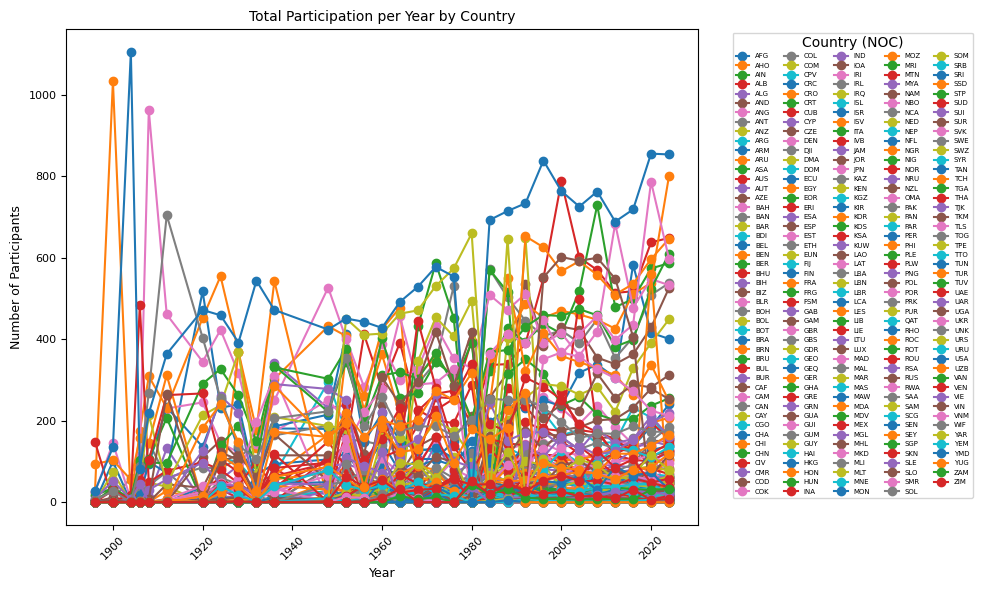

In [384]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


In [385]:
participation_by_year_country

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,48,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,38,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,15,0,0
1924,0,0,0,0,0,0,0,0,0,109,...,0,0,0,0,0,0,0,114,0,0
1928,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,86,0,2


In [386]:
# 假设 NOC 是你想要删除的列名
noc_names_to_remove = medal_counts['NOC'].unique()

# 删除对应的列
participation_by_year_country_without_medal = participation_by_year_country.drop(columns=noc_names_to_remove, errors='ignore')
participation_by_year_country_without_medal

NOC,AIN,AND,ANG,ANT,ARU,ASA,BAN,BEN,BHU,BIH,...,TUV,UAR,UNK,VAN,VIN,VNM,WIF,YAR,YEM,YMD
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2 未获奖国家参赛趋势

<Figure size 1000x600 with 0 Axes>

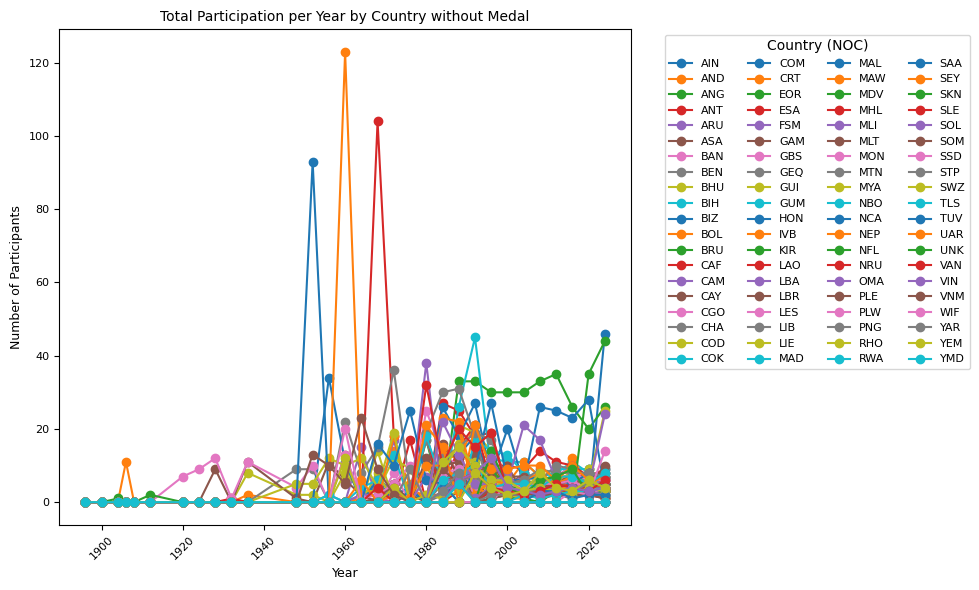

In [387]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
participation_by_year_country_without_medal.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country without Medal', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=4)

plt.tight_layout()
plt.show()


## 最后5年趋势

<Figure size 1000x600 with 0 Axes>

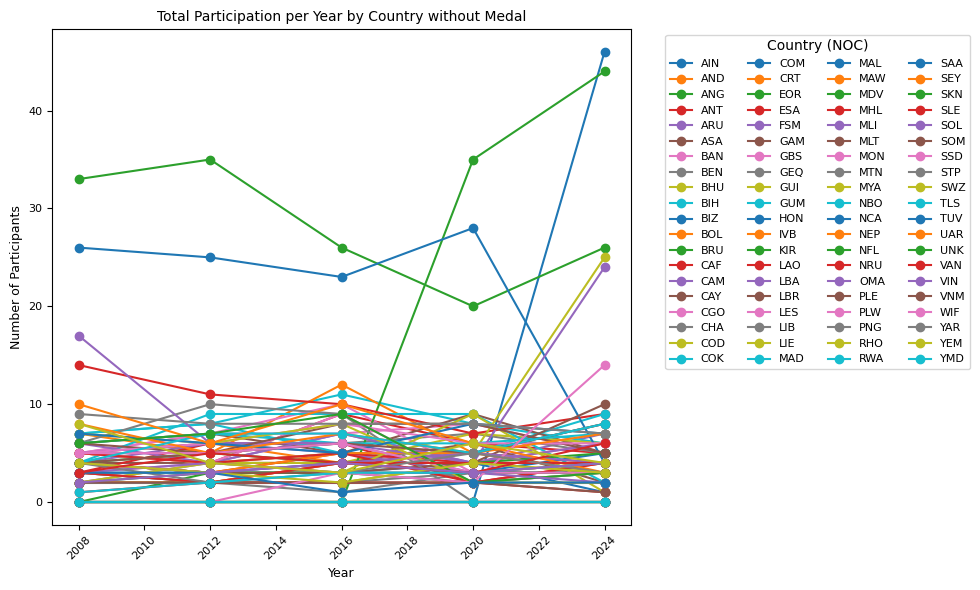

In [388]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
participation_by_year_country_without_medal.tail(5).plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country without Medal', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=4)

plt.tight_layout()
plt.show()


In [553]:
print(participation_by_year_country_without_medal)

NOC   AIN  AND  ANG  ANT  ARU  ASA  BAN  BEN  BHU  BIH  ...  TUV  UAR  UNK  \
Year                                                    ...                  
1896    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1900    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1904    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1906    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1908    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1912    0    0    0    0    0    0    0    0    0    0  ...    0    0    2   
1920    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1924    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1928    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1932    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1936    0    0    0    0    0    0    0    0    0    0  ...    0

## 2.3 获取突然获奖前5届人员的趋势

In [389]:
medals_by_year

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,2,5,0,...,0,0,0,20,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,5,6,0,...,0,0,0,48,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,4,3,0,...,0,0,0,231,0,0,0,0,0,0
1908,0,0,0,0,5,0,0,0,1,0,...,0,0,0,47,0,0,0,0,0,0
1912,0,0,0,0,7,0,0,0,4,0,...,0,0,0,64,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,3,0,0,...,0,0,0,95,0,0,0,0,0,0
1924,0,0,0,0,0,6,0,6,4,0,...,0,0,1,99,0,0,0,2,0,0
1928,0,0,0,0,0,7,0,4,3,0,...,0,0,1,56,0,0,0,5,0,0
1932,0,0,0,0,0,4,0,5,5,0,...,0,0,1,110,0,0,0,0,0,0


## 获取第一次获奖的年份

In [402]:
# 创建一个空列表来保存列名和第一次非0的行名
first_nonzero_rows = []

# 遍历每列，找到第一次非0的行
for col in medals_by_year.columns:
    # 获取每列第一次非0的行索引
    first_nonzero_index = medals_by_year[medals_by_year[col] != 0].index[0] if (medals_by_year[col] != 0).any() else None
    # 将列名和对应的第一次非0行索引添加到列表中
    first_nonzero_rows.append([col, first_nonzero_index])

# 将结果转换为 DataFrame
first_medal = pd.DataFrame(first_nonzero_rows, columns=['NOC', 'First Medal Year'])

# 去掉 'First Medal Year' 列小于 1920 的行
first_medal_filtered = first_medal[first_medal['First Medal Year'] >= 1920]

# 查看结果
first_medal_filtered


,NOC,First Medal Year
0,AFG,2008
1,AHO,1988
2,ALB,2024
3,ALG,1984
5,ARG,1924
...,...,...
152,VEN,1952
153,VIE,2000
154,YUG,1924
155,ZAM,1984


## 构造能获奖和不能获奖的数据集

In [465]:
import pandas as pd
import numpy as np

# 假设 first_medal_filtered, participation_by_year_country, participation_by_year_country_without_medal 是现有的 DataFrame

# 新建一个空的列表来存储每行的数据
new_table_data = []

# 获取 first_medal_filtered 中的第一列内容（国家）
countries = first_medal_filtered.iloc[:, 0].values

# 获取 first_medal_filtered 中的 'First Medal Year' 列内容（获奖年份）
first_medal_years = first_medal_filtered['First Medal Year'].values

# 遍历每个国家，填充已有的数据
for noc, first_medal_year in zip(countries, first_medal_years):  
    if noc in participation_by_year_country.columns:  # 确保 noc 存在于 participation_by_year_country 的列中
        # 获取该 NOC 代码在 participation_by_year_country 中的列，并根据 'First Medal Year' 取出前5年的数据
        # 获取从 first_medal_year - 5 到 first_medal_year - 1 年的数据
        country_data = participation_by_year_country[noc].loc[first_medal_year - 20:first_medal_year - 1].values  # 获取前5年的数据

        # 如果数据少于5个，则填充为0
        if len(country_data) < 5:
            country_data = list(country_data) + [0] * (5 - len(country_data))

        # 在最后一行添加 1
        country_data = list(country_data) + [1]

        # 将 NOC 和数据添加到新表格中
        new_table_data.append([noc] + list(country_data))

# 创建新表格
tree_dataset = pd.DataFrame(new_table_data, columns=['NOC'] + [f'{i+1}' for i in range(5)] + ['will have medal'])

# 填充缺失值为0
tree_dataset = tree_dataset.fillna(0)

# 删除全零行
tree_dataset = tree_dataset.loc[~(tree_dataset.iloc[:, 1:-2].eq(0)).all(axis=1)]

# 添加新的数据：从 participation_by_year_country_without_medal 获取数据
for noc in participation_by_year_country_without_medal.columns:
    # 获取该国家的所有参赛数据
    country_data = participation_by_year_country_without_medal[noc].values
    
    # 获取连续的 5 行数据，并根据概率调整下方数据被选中的概率
    max_index = len(country_data) - 5  # 最多可以选择到的索引（确保我们有 5 个数据）
    
    for i in range(2):  # 限制每个国家只选取2组数据
        # 随机选取5年数据，选择的概率稍微倾向于下方的数据
        # 我们可以用 `np.random.choice` 来实现带概率的随机选择
        weights = np.arange(1, max_index + 1)  # 使得下方的索引选择概率更大
        selected_start_index = np.random.choice(np.arange(max_index), p=weights / weights.sum())  # 带权重选择

        # 获取连续 5 年的数据
        consecutive_years_data = country_data[selected_start_index:selected_start_index+5]

        # 添加到 new_table_data 中
        new_table_data.append([noc] + list(consecutive_years_data) + [0])

# 将新的数据添加到原始的 tree_dataset 中
new_entries = pd.DataFrame(new_table_data, columns=['NOC'] + [f'{i+1}' for i in range(5)] + ['will have medal'])
tree_dataset = pd.concat([tree_dataset, new_entries], ignore_index=True)

# 填充缺失值为0
tree_dataset = tree_dataset.fillna(0)

# 删除全零行
tree_dataset = tree_dataset.loc[~(tree_dataset.iloc[:, 1:-2].eq(0)).all(axis=1)]

# 显示最终的表格
tree_dataset


,NOC,1,2,3,4,5,will have medal
0,AFG,5,0,2,0,5,1
1,AHO,5,2,4,0,13,1
2,ALB,7,12,10,6,10,1
3,ALG,7,9,7,0,63,1
4,ARG,0,0,1,0,1,1
...,...,...,...,...,...,...,...
361,VIN,8,12,4,3,2,0
365,WIF,20,0,0,0,0,0
368,YEM,3,8,4,3,6,0
369,YEM,8,4,2,3,8,0


## 随机森林+投票=集成学习

Best RandomForest Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best SVC Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best LogisticRegression Parameters: {'C': 0.1, 'solver': 'saga'}
Tuned ensemble model training set accuracy: 0.9078
Tuned ensemble model testing set accuracy: 0.7500
Confusion matrix:
[[ 7  9]
 [ 4 32]]


E:\python_project\MCM\.venv\lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


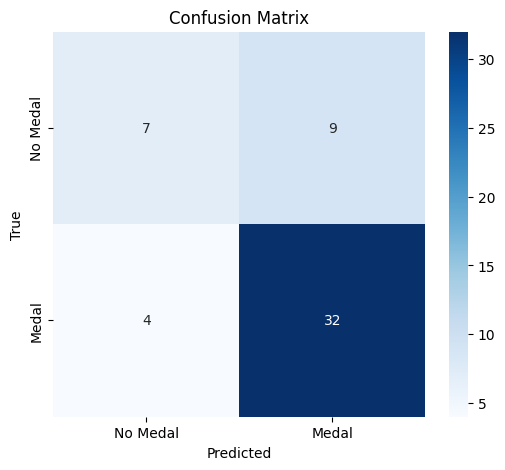

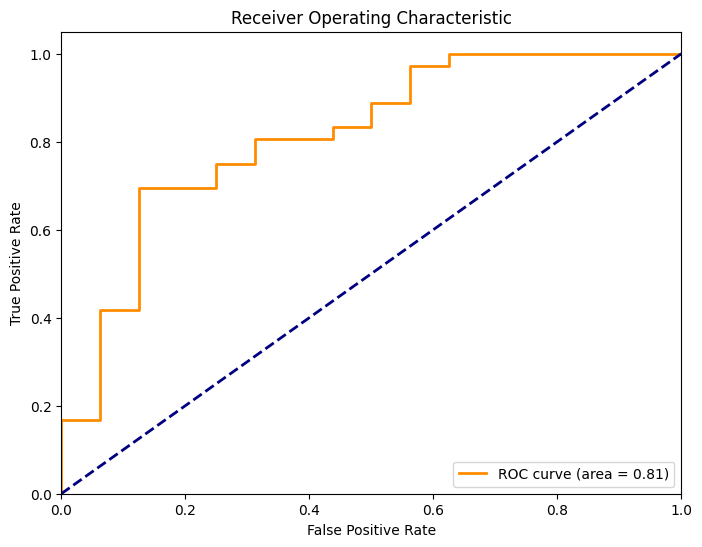

In [567]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

# 假设 tree_dataset 是已经准备好的 DataFrame
# 这里需要确保你的 DataFrame 已经加载

# Step 1: 准备特征和目标变量
X = tree_dataset[['1', '2', '3', '4', '5']]  # 特征列（前5年的数据）
y = tree_dataset['will have medal']  # 目标变量列（是否获得奖牌）

# Step 2: 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Hyperparameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Hyperparameter grid for LogisticRegression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

# Step 4: Perform GridSearchCV for RandomForestClassifier
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best RandomForest Parameters:", rf_grid_search.best_params_)

# Step 5: Perform GridSearchCV for SVC
svc_grid_search = GridSearchCV(SVC(probability=True, random_state=42), svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)
print("Best SVC Parameters:", svc_grid_search.best_params_)

# Step 6: Perform GridSearchCV for LogisticRegression
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print("Best LogisticRegression Parameters:", lr_grid_search.best_params_)

# Step 7: Create the ensemble model with tuned classifiers
ensemble_model_tuned = VotingClassifier(estimators=[
    ('rf', rf_grid_search.best_estimator_),
    ('svc', svc_grid_search.best_estimator_),
    ('lr', lr_grid_search.best_estimator_)
], voting='soft')

# Step 8: Train and evaluate the ensemble model
ensemble_model_tuned.fit(X_train, y_train)

# Calibrate the ensemble model
calibrated_model_tuned = CalibratedClassifierCV(ensemble_model_tuned, method='sigmoid', cv='prefit')
calibrated_model_tuned.fit(X_test, y_test)

# Step 9: Evaluate performance
train_accuracy_tuned = calibrated_model_tuned.score(X_train, y_train)
test_accuracy_tuned = calibrated_model_tuned.score(X_test, y_test)

print(f"Tuned ensemble model training set accuracy: {train_accuracy_tuned:.4f}")
print(f"Tuned ensemble model testing set accuracy: {test_accuracy_tuned:.4f}")

# Step 10: 计算并打印混淆矩阵
y_pred = calibrated_model_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Step 11: 绘制混淆矩阵热力图
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 12: 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, calibrated_model_tuned.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


[[ 0  0  0  0 46]]
[[5 6 4 3 4]]
[[33 35 26 20 26]]
[[5 4 9 6 5]]
[[2 4 7 4 7]]
[[4 4 4 6 2]]
[[5 7 7 8 5]]
[[5 5 6 7 5]]
[[2 2 2 4 3]]
[[ 7  8 11  8  6]]
[[4 3 3 4 1]]
[[ 7  5 12  5  4]]
[[0 3 3 2 3]]
[[3 6 6 2 4]]
[[4 6 6 3 3]]
[[6 7 5 9 5]]
[[ 5  7 10  3  4]]
[[2 2 2 3 3]]
[[5 4 4 7 6]]
[[4 9 9 9 2]]
[[3 3 4 3 5]]
[[0 0 0 0 0]]
[[ 0  0  0 35 44]]
[[14 11 10  7  9]]
[[5 6 5 3 3]]
[[3 2 4 5 8]]
[[3 4 5 4 6]]
[[3 2 1 3 3]]
[[ 5  4  5  5 25]]
[[7 8 5 5 9]]
[[26 25 23 28  4]]
[[2 2 4 3 4]]
[[2 3 3 3 3]]
[[4 3 5 4 4]]
[[6 4 7 4 6]]
[[ 4  3  3  4 10]]
[[5 4 9 2 3]]
[[ 6 10  9  0  0]]
[[2 4 3 9 1]]
[[6 7 6 6 7]]
[[0 0 0 0 0]]
[[4 3 5 5 3]]
[[4 5 4 4 5]]
[[5 4 5 2 4]]
[[17  6  6  4 24]]
[[6 5 8 8 5]]
[[5 6 8 6 6]]
[[2 2 2 2 2]]
[[7 6 8 2 2]]
[[0 0 0 0 0]]
[[7 6 5 8 7]]
[[8 5 7 5 7]]
[[0 0 0 0 0]]
[[1 2 2 2 1]]
[[4 3 4 5 4]]
[[4 5 6 5 8]]
[[5 5 6 3 3]]
[[9 8 8 8 7]]
[[0 0 0 0 0]]
[[4 7 7 5 8]]
[[0 0 0 0 0]]
[[10  6 10  6  3]]
[[6 7 9 2 3]]
[[3 2 4 4 4]]
[[3 4 3 3 2]]
[[2 2 2 2 1]]
[[ 0  0  3 

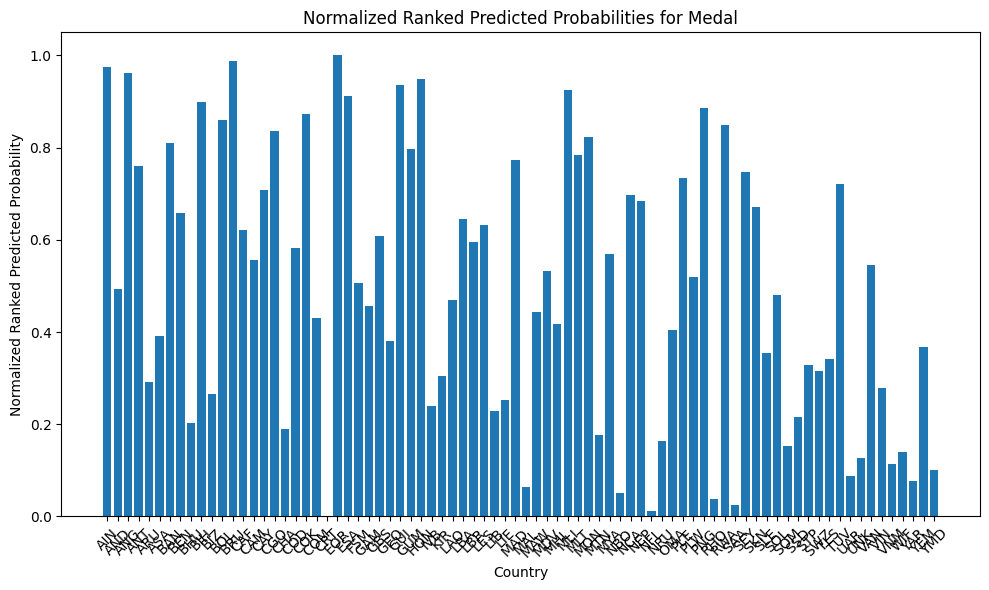

In [570]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 participation_by_year_country_without_medal 是你的 DataFrame
# 假设 calibrated_model_tuned 是经过训练的最佳模型

# Step 1: 存储每列的预测概率
predicted_probabilities_all_columns = []

# Step 2: 遍历每一列，对列中的5个数值进行预测
for column in participation_by_year_country_without_medal.columns:
    # 提取当前列的最后5个值
    last_5_values = participation_by_year_country_without_medal[column].tail(5).values.reshape(1, -1)  # Reshaping to (1, 5)
    print(last_5_values)
    
    # 预测概率（假设best_model已经训练好）
    probabilities = calibrated_model_tuned.predict_proba(last_5_values)
    
    # 获取预测为1（获得奖牌）的概率
    predicted_probabilities = probabilities[:, 1]
    
    # 将预测概率存储到列表中
    predicted_probabilities_all_columns.append(predicted_probabilities[0])  # 取出每列的第一个预测值（因为我们只预测了一个数）

print("Predicted Probabilities (before ranking normalization):", predicted_probabilities_all_columns)

# Step 3: 对预测概率进行排名并归一化
# 获取排序后的索引
ranked_probabilities = np.argsort(predicted_probabilities_all_columns)

# 将排名转换为 [0, 1] 范围内的归一化值
normalized_ranked_probabilities = np.linspace(0, 1, len(predicted_probabilities_all_columns))

# 将归一化值按预测概率的顺序重新排列
normalized_probabilities = [normalized_ranked_probabilities[ranked_probabilities.tolist().index(i)] for i in range(len(predicted_probabilities_all_columns))]

print("Normalized Ranked Probabilities:", normalized_probabilities)

# Step 4: 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(participation_by_year_country_without_medal.columns, normalized_probabilities)
plt.xlabel('Country')
plt.ylabel('Normalized Ranked Predicted Probability')
plt.title('Normalized Ranked Predicted Probabilities for Medal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 多层感知机

In [571]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# 假设 tree_dataset 是已经准备好的 DataFrame
# 这里需要确保你的 DataFrame 已经加载

# Step 1: 准备特征和目标变量
X = tree_dataset[['1', '2', '3', '4', '5']]  # 特征列（前5年的数据）
y = tree_dataset['will have medal']  # 目标变量列（是否获得奖牌）

# Step 2: 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: 调整神经网络的参数，尝试不同的超参数
param_grid = {
    'hidden_layer_sizes': [(100,), (150,), (100, 100), (50, 50)],  # 尝试不同的隐藏层结构
    'max_iter': [1000, 2000, 3000],  # 尝试不同的最大迭代次数
    'learning_rate_init': [0.001, 0.0005, 0.01],  # 不同的学习率
    'alpha': [0.0001, 0.001, 0.01],  # 正则化参数
    'momentum': [0.9, 0.95, 0.99],  # 动量值
    'early_stopping': [True],  # 启用早停
    'random_state': [42]
}

# Step 5: 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print(f"最佳超参数: {best_params}")

# 使用最佳超参数训练的模型
best_model = grid_search.best_estimator_

# Step 6: 输出训练集和测试集的准确率
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"训练集准确率: {train_accuracy:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
最佳超参数: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 1000, 'momentum': 0.9, 'random_state': 42}
训练集准确率: 0.7136
测试集准确率: 0.6731


[[ 0  0  0  0 46]]
[[5 6 4 3 4]]
[[33 35 26 20 26]]
[[5 4 9 6 5]]
[[2 4 7 4 7]]
[[4 4 4 6 2]]
[[5 7 7 8 5]]
[[5 5 6 7 5]]
[[2 2 2 4 3]]
[[ 7  8 11  8  6]]
[[4 3 3 4 1]]
[[ 7  5 12  5  4]]
[[0 3 3 2 3]]
[[3 6 6 2 4]]
[[4 6 6 3 3]]
[[6 7 5 9 5]]
[[ 5  7 10  3  4]]
[[2 2 2 3 3]]
[[5 4 4 7 6]]
[[4 9 9 9 2]]
[[3 3 4 3 5]]
[[0 0 0 0 0]]
[[ 0  0  0 35 44]]
[[14 11 10  7  9]]
[[5 6 5 3 3]]
[[3 2 4 5 8]]
[[3 4 5 4 6]]
[[3 2 1 3 3]]
[[ 5  4  5  5 25]]
[[7 8 5 5 9]]
[[26 25 23 28  4]]
[[2 2 4 3 4]]
[[2 3 3 3 3]]
[[4 3 5 4 4]]
[[6 4 7 4 6]]
[[ 4  3  3  4 10]]
[[5 4 9 2 3]]
[[ 6 10  9  0  0]]
[[2 4 3 9 1]]
[[6 7 6 6 7]]
[[0 0 0 0 0]]
[[4 3 5 5 3]]
[[4 5 4 4 5]]
[[5 4 5 2 4]]
[[17  6  6  4 24]]
[[6 5 8 8 5]]
[[5 6 8 6 6]]
[[2 2 2 2 2]]
[[7 6 8 2 2]]
[[0 0 0 0 0]]
[[7 6 5 8 7]]
[[8 5 7 5 7]]
[[0 0 0 0 0]]
[[1 2 2 2 1]]
[[4 3 4 5 4]]
[[4 5 6 5 8]]
[[5 5 6 3 3]]
[[9 8 8 8 7]]
[[0 0 0 0 0]]
[[4 7 7 5 8]]
[[0 0 0 0 0]]
[[10  6 10  6  3]]
[[6 7 9 2 3]]
[[3 2 4 4 4]]
[[3 4 3 3 2]]
[[2 2 2 2 1]]
[[ 0  0  3 

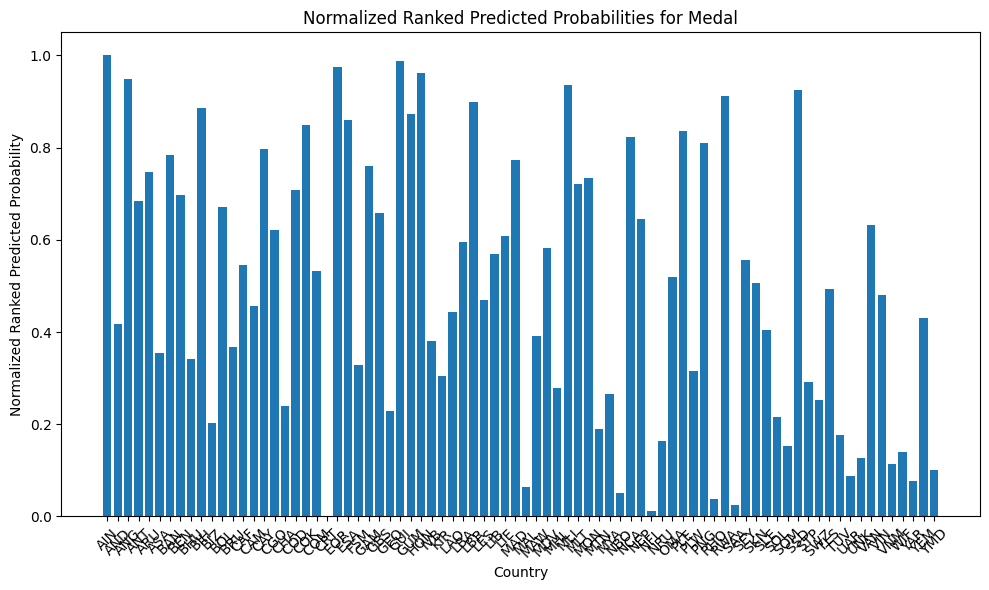

In [575]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 participation_by_year_country_without_medal 是你的 DataFrame
# 假设 calibrated_model_tuned 是经过训练的最佳模型

# Step 1: 存储每列的预测概率
predicted_probabilities_all_columns = []

# Step 2: 遍历每一列，对列中的5个数值进行预测
for column in participation_by_year_country_without_medal.columns:
    # 提取当前列的最后5个值
    last_5_values = participation_by_year_country_without_medal[column].tail(5).values.reshape(1, -1)  # Reshaping to (1, 5)
    print(last_5_values)
    
    # 预测概率（假设best_model已经训练好）
    probabilities = best_model.predict_proba(last_5_values)
    
    # 获取预测为1（获得奖牌）的概率
    predicted_probabilities = probabilities[:, 1]
    
    # 将预测概率存储到列表中
    predicted_probabilities_all_columns.append(predicted_probabilities[0])  # 取出每列的第一个预测值（因为我们只预测了一个数）

print("Predicted Probabilities (before ranking normalization):", predicted_probabilities_all_columns)

# Step 3: 对预测概率进行排名并归一化
# 获取排序后的索引
ranked_probabilities = np.argsort(predicted_probabilities_all_columns)

# 将排名转换为 [0, 1] 范围内的归一化值
normalized_ranked_probabilities = np.linspace(0, 1, len(predicted_probabilities_all_columns))

# 将归一化值按预测概率的顺序重新排列
normalized_probabilities = [normalized_ranked_probabilities[ranked_probabilities.tolist().index(i)] for i in range(len(predicted_probabilities_all_columns))]

print("Normalized Ranked Probabilities:", normalized_probabilities)

# Step 4: 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(participation_by_year_country_without_medal.columns, normalized_probabilities)
plt.xlabel('Country')
plt.ylabel('Normalized Ranked Predicted Probability')
plt.title('Normalized Ranked Predicted Probabilities for Medal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
